In [9]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
import os

In [11]:
os.chdir('/content/gdrive/MyDrive/cotton_disease/Cotton disease')


In [12]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [13]:
from tensorflow.keras.layers import Input , Dense, Flatten , Lambda 
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob
import numpy as np
import matplotlib.pyplot as plt


In [14]:
IMAGE_SIZE = [224,224]

train_path = 'Dataset/train'
test_path = 'Dataset/test'

In [15]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3],weights='imagenet',include_top=False)

In [16]:
for layer in vgg16.layers:
  layer.trainable = False

In [17]:
X = Flatten()(vgg16.output)

In [18]:
folders = glob('Dataset/train/*')

In [19]:
folders

['Dataset/train/diseased cotton plant',
 'Dataset/train/diseased cotton leaf',
 'Dataset/train/fresh cotton leaf',
 'Dataset/train/fresh cotton plant']

In [20]:
prediction = Dense(len(folders),activation='softmax')(X)

In [21]:
model = Model(inputs = vgg16.input,outputs = prediction)

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [25]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
train_set = train_datagen.flow_from_directory('Dataset/train',target_size = (224, 224),batch_size = 32,class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [27]:
test_set = test_datagen.flow_from_directory('Dataset/test',target_size = (224, 224),batch_size = 32,class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [28]:
r = model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 762s 12s/step - loss: 0.6338 - accuracy: 0.7724 - val_loss: 0.1471 - val_accuracy: 0.8889
Epoch 2/20
61/61 [==============================] - 44s 720ms/step - loss: 0.2257 - accuracy: 0.9211 - val_loss: 0.2627 - val_accuracy: 0.8333
Epoch 3/20
61/61 [==============================] - 44s 716ms/step - loss: 0.1516 - accuracy: 0.9569 - val_loss: 0.1191 - val_accuracy: 0.9444
Epoch 4/20
61/61 [==============================] - 44s 724ms/step - loss: 0.1297 - accuracy: 0.9585 - val_loss: 0.2431 - val_accuracy: 0.8889
Epoch 5/20
61/61 [==============================] - 44s 727ms/step - loss: 0.1339 - accuracy: 0.9477 - val_loss: 0.0614 - val_accuracy: 0.9444
Epoch 6/20
61/61 [==============================] - 44s 712ms/step - loss: 0.0846 - accuracy: 0.9769 - val_loss: 0.1061 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 44s 714ms/step - loss: 0.0850 - accuracy: 0.9728 - val_loss: 0.1825 - val_accuracy: 0.9444


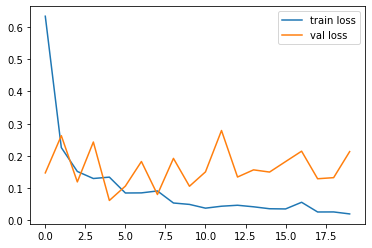

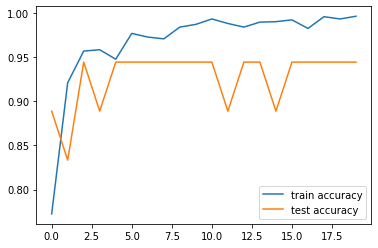

<Figure size 432x288 with 0 Axes>

In [29]:
plt.plot(r.history["loss"],label='train loss')
plt.plot(r.history["val_loss"],label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'],label = 'train accuracy')
plt.plot(r.history["val_accuracy"],label = 'test accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
from tensorflow.keras.models import load_model
model.save('model_vgg16.h5')

In [31]:
y_pred = model.predict(test_set)

In [32]:
y_pred

array([[4.0296631e-04, 8.4295183e-02, 6.1360195e-05, 9.1524053e-01],
       [1.7622301e-04, 1.3943863e-07, 9.9982303e-01, 6.4410807e-07],
       [4.3583373e-03, 8.3334227e-05, 9.9554437e-01, 1.3994208e-05],
       [2.0186374e-07, 9.9996316e-01, 4.6354958e-06, 3.1995904e-05],
       [1.1833213e-04, 1.2336241e-09, 9.9988163e-01, 7.2971372e-11],
       [9.9999845e-01, 2.9953665e-07, 1.1958612e-06, 4.5557318e-08],
       [9.9999952e-01, 1.5131042e-07, 3.9581849e-07, 8.3082543e-12],
       [4.8415632e-07, 9.9985814e-01, 1.4213754e-07, 1.4121237e-04],
       [7.7752793e-01, 2.2246405e-01, 3.0105273e-06, 5.0167919e-06],
       [6.1570977e-06, 1.0331318e-05, 1.3310713e-05, 9.9997020e-01],
       [3.9965771e-03, 1.1149163e-03, 2.4878457e-08, 9.9488848e-01],
       [2.6585718e-05, 1.3279985e-04, 9.9984050e-01, 1.0528165e-07],
       [8.0915689e-03, 7.7404405e-07, 9.9190676e-01, 9.3222332e-07],
       [3.6178581e-06, 1.9970702e-03, 9.2171131e-06, 9.9799013e-01],
       [1.6224134e-04, 9.6889460e-

In [33]:
import numpy as np
y_pred = np.argmax(y_pred,axis=1)

In [34]:
y_pred

array([3, 2, 2, 1, 2, 0, 0, 1, 0, 3, 3, 2, 2, 3, 1, 1, 1, 1])

In [35]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [36]:
model=load_model('model_vgg16.h5')

In [39]:
img=image.load_img('Dataset/val/diseased cotton leaf/dis_leaf (100)_iaip.jpg',target_size=(224,224))

In [40]:
x = image.img_to_array(img)

In [41]:
x

array([[[175., 233., 157.],
        [177., 235., 159.],
        [178., 236., 160.],
        ...,
        [ 74.,  64.,  55.],
        [ 69.,  62.,  56.],
        [ 69.,  62.,  56.]],

       [[177., 235., 159.],
        [179., 237., 161.],
        [180., 238., 162.],
        ...,
        [ 69.,  59.,  50.],
        [ 60.,  53.,  47.],
        [ 59.,  52.,  46.]],

       [[178., 236., 160.],
        [180., 238., 162.],
        [182., 240., 164.],
        ...,
        [ 65.,  55.,  46.],
        [ 59.,  52.,  46.],
        [ 59.,  52.,  46.]],

       ...,

       [[115., 181., 120.],
        [109., 175., 114.],
        [108., 174., 113.],
        ...,
        [138., 216., 106.],
        [142., 221., 104.],
        [142., 221., 104.]],

       [[121., 181., 119.],
        [116., 176., 114.],
        [113., 173., 111.],
        ...,
        [140., 218., 108.],
        [143., 216., 108.],
        [145., 218., 110.]],

       [[118., 178., 116.],
        [117., 177., 115.],
        [116., 1

In [42]:
x=x/255

In [43]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [44]:
model.predict(img_data)

array([[1.0000000e+00, 1.3934909e-11, 3.0877609e-13, 2.2758750e-08]],
      dtype=float32)

In [45]:

a=np.argmax(model.predict(img_data), axis=1)

In [46]:
a

array([0])

In [47]:
a==0

array([ True])

In [ ]:
#predicted correctly as the image is of diseased cotton leaf 